**Investigating energy conservation in the case of constant rotation**

In [1]:
import sys
sys.path.append("../..")

import numpy as np
from wobble.rb_simple import SimpleRB
from wobble.rb_coupled import CoupledRB
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
time_step=1e-5
max_steps=400
omega=np.array([10**0,0,0])

sim=SimpleRB('test', 3, 
             mesh_file='../sample_data_files/mesh_files/beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                num_modes=10,
                force_path='../sample_data_files/force_files/no_force.txt',
            timestep=time_step,
            T=time_step*max_steps)
sim.set_up()
sim.set_initial_conditions()
sim.handle_forces(eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv')
sim.rb_omega_0 = omega
sim.solve_system()
sim.get_total_displacement_vectors(scale_factor=1)
sim.get_rotation_angles()
sim.get_energy()

cup=CoupledRB('test', 3, 
             mesh_file='../sample_data_files/mesh_files/beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                num_modes=10,
                force_path='../sample_data_files/force_files/no_force.txt',
            timestep=time_step,
            T=time_step*max_steps)
cup.set_up()
cup.set_initial_conditions()
cup.handle_forces(eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv')
cup.rb_omega_0 = omega
cup.solve_system()
cup.get_total_displacement_vectors(scale_factor=1)
cup.get_rotation_angles()
cup.get_energy()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


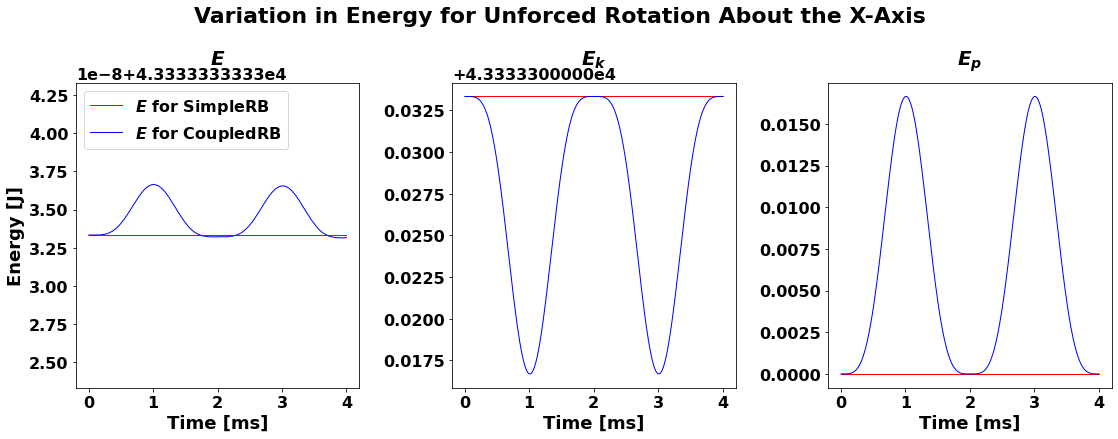

In [40]:
fig,ax=plt.subplots(1, 3, figsize=(16,6))
ax[0].plot(sim.time_array*10**3, sim.pe+sim.ke, 'r-', linewidth=1, label='$E$ for SimpleRB')
ax[0].plot(cup.time_array*10**3, cup.pe+cup.ke, 'b-', linewidth=1, label='$E$ for CoupledRB')
ax[0].set_title('$E$', fontweight="bold", y=1.04, fontsize=20)
ax[0].set_xlabel('Time [ms]')
ax[1].plot(sim.time_array*10**3, sim.ke, 'r-', linewidth=1, label='$E$ for SimpleRB')
ax[1].plot(cup.time_array*10**3, cup.ke, 'b-', linewidth=1, label='$E$ for CoupledRB')
ax[1].set_title('$E_k$', fontweight="bold", y=1.04, fontsize=20)
ax[1].set_xlabel('Time [ms]')
ax[2].plot(sim.time_array*10**3, sim.pe, 'r-', linewidth=1, label='$E$ for SimpleRB')
ax[2].plot(cup.time_array*10**3, cup.pe, 'b-', linewidth=1, label='$E$ for CoupledRB')
ax[2].set_title('$E_p$', fontweight="bold", y=1.04, fontsize=20)
ax[2].set_xlabel('Time [ms]')

ax[0].set_ylabel('Energy [J]')

ax[0].set_ylim([cup.ke[0]-10**-8, cup.ke[0]+10**-8])
# ax[0].set_ylim([])

ax[0].legend(loc='upper left')
fig.tight_layout()
plt.suptitle("Variation in Energy for Unforced Rotation About the X-Axis", fontweight='bold', y=1.04)
#plt.savefig('energy_comp_const_omega.png', bbox_inches='tight')
plt.show()